In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [17]:
#create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [19]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

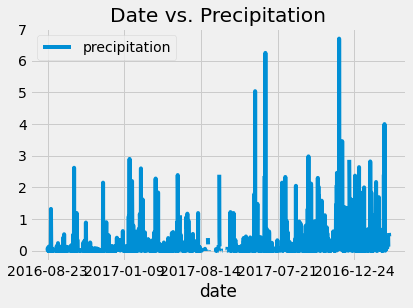

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
inspector = inspect(engine)
inspector.get_table_names()


# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
for row in query_results:
    print(row.date, row.prcp)

# Save the query results as a Pandas DataFrame
prcp_df= pd.DataFrame(query_results, columns= ['date','precipitation'])
prcp_df.head()

# Sort the dataframe by date
prcp_df.sort_values('date')
prcp_df.head()

#Set index
prcp_df.set_index(prcp_df['date'], inplace=True)
prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='precipitation', kind= "line", ax = None, legend = True, title = "Date vs. Precipitation") 
plt.show()


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9,)]

In [25]:
# What are the most active stations?
# List the stations and the counts in descending order.
most_activate_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_activate_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
calculation = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()
calculation

[(54.0, 85.0, 71.66378066378067)]

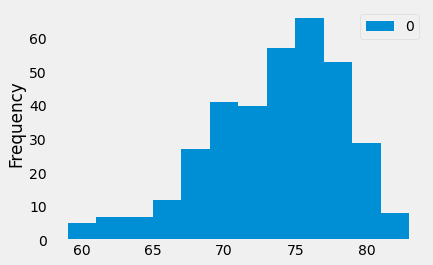

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Calculating the previous year from 8/23/2017
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

station_highest_obs = session.query(Measurement.tobs).\
                        filter(Measurement.station == 'USC00519281').\
                        filter(Measurement.date >= prev_year).all()
tobs_df=pd.DataFrame(station_highest_obs)
tobs_df.head()

tobs_df.plot.hist(bins=12)
plt.grid()

In [28]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    c_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                    filter(Measurement.date >= start_date).\
                    filter(Measurement.date <= end_date).all()
    return c_results
calc_temps('2017-01-01', '2017-12-31')


[(58.0, 74.14387974230493, 87.0)]

# Challenge